# Structure-Based Classification of Antigen Presentation and T Cell Recognition 
PAML Final Project \
Melissa Pathil

In [1]:
import pandas as pd
import numpy as np
import random 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from itertools import combinations
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None  # default='warn'
import textwrap

In [2]:
# Set random seed=10 to produce consistent results
random.seed(10)

## 1. Data Collection, Exploration, and Processing

### 1.1 Data Collection

In [3]:
# Function to binarize target class
def categorize_presenter(pred_Kd):
    if pred_Kd <= 500:
        return 'strong_intermediate'
    elif pred_Kd > 500:
        return 'nonbinder'
    
# Dictionary used to generate final CSV    
TCR_epitope_dict = dict()
for i in range(1,8):
    if i < 4:
        TCR_epitope_dict[f'TCR{i}'] = "NLVPMVATV"
    elif i < 7:
        TCR_epitope_dict[f'TCR{i}'] = "IMDQVPFSV"
    else:
        TCR_epitope_dict[f'TCR{i}'] = "GRLKALCQR"
print(TCR_epitope_dict)

{'TCR1': 'NLVPMVATV', 'TCR2': 'NLVPMVATV', 'TCR3': 'NLVPMVATV', 'TCR4': 'IMDQVPFSV', 'TCR5': 'IMDQVPFSV', 'TCR6': 'IMDQVPFSV', 'TCR7': 'GRLKALCQR'}


In [47]:
df = pd.read_csv('MelissaPathil_pMHC_TCR_dataset.csv') # change to correct file path

In [6]:
df.head(5)

,structure,ranking_score,ptm,iptm,chainA_iptm,chainC_iptm,chainD_iptm,chainE_iptm,A1_pLDDT,A2_pLDDT,...,rmsd_peptide_position_6,rmsd_peptide_position_7,rmsd_peptide_position_8,rmsd_peptide_position_9,peptide,logA,obs_logC,affinity,best_allele,presenter_category
0,100_nlvpmeatv_hla_a_02_01_tcr1,0.5656,0.554,0.4684,0.4664,0.4928,0.454,0.446,74.052,85.0892,...,0.570504,0.355645,0.229677,0.199879,V6E,1.227824,15.549309,41.938726,A*02:01,strong_intermediate
1,100_nlvpmeatv_hla_a_02_01_tcr1,0.5656,0.554,0.4684,0.4664,0.4928,0.454,0.446,74.052,85.0892,...,0.873525,0.517846,0.295245,0.243213,V6E,1.227824,15.549309,41.938726,A*02:01,strong_intermediate
2,100_nlvpmeatv_hla_a_02_01_tcr1,0.5656,0.554,0.4684,0.4664,0.4928,0.454,0.446,74.052,85.0892,...,0.498737,0.595805,0.252940,0.130900,V6E,1.227824,15.549309,41.938726,A*02:01,strong_intermediate
3,100_nlvpmeatv_hla_a_02_01_tcr1,0.5656,0.554,0.4684,0.4664,0.4928,0.454,0.446,74.052,85.0892,...,0.570504,0.355645,0.229677,0.199879,V6E,1.227824,15.549309,41.938726,A*02:01,strong_intermediate
4,100_nlvpmeatv_hla_a_02_01_tcr1,0.5656,0.554,0.4684,0.4664,0.4928,0.454,0.446,74.052,85.0892,...,0.654984,0.537419,0.288563,0.278227,V6E,1.227824,15.549309,41.938726,A*02:01,strong_intermediate


In [7]:
print(f'Shape of dataframe: {df.shape}')
print(df.columns)

Shape of dataframe: (26676, 44)
Index(['structure', 'ranking_score', 'ptm', 'iptm', 'chainA_iptm',
       'chainC_iptm', 'chainD_iptm', 'chainE_iptm', 'A1_pLDDT', 'A2_pLDDT',
       'A3_pLDDT', 'A4_pLDDT', 'A5_pLDDT', 'A6_pLDDT', 'A7_pLDDT', 'A8_pLDDT',
       'A9_pLDDT', 'A_average_pLDDT', 'C_average_pLDDT', 'D_average_pLDDT',
       'E_average_pLDDT', 'epitope', 'seed_sample', 'ID', 'rmsd_complex_Ca',
       'rmsd_HLA_groove_all_atom', 'rmsd_TCR_Ca', 'rmsd_peptide_all_atom',
       'rmsd_peptide_backbone', 'rmsd_peptide_position_1',
       'rmsd_peptide_position_2', 'rmsd_peptide_position_3',
       'rmsd_peptide_position_4', 'rmsd_peptide_position_5',
       'rmsd_peptide_position_6', 'rmsd_peptide_position_7',
       'rmsd_peptide_position_8', 'rmsd_peptide_position_9', 'peptide', 'logA',
       'obs_logC', 'affinity', 'best_allele', 'presenter_category'],
      dtype='object')


In [8]:
df.describe()

,ranking_score,ptm,iptm,chainA_iptm,chainC_iptm,chainD_iptm,chainE_iptm,A1_pLDDT,A2_pLDDT,A3_pLDDT,...,rmsd_peptide_position_3,rmsd_peptide_position_4,rmsd_peptide_position_5,rmsd_peptide_position_6,rmsd_peptide_position_7,rmsd_peptide_position_8,rmsd_peptide_position_9,logA,obs_logC,affinity
count,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,26650.000000,...,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000,26676.000000
mean,0.614193,0.579635,0.521269,0.549723,0.551002,0.509359,0.508104,81.543493,87.170605,88.386295,...,0.401571,1.205504,1.126874,0.896967,0.770492,0.383327,0.262293,1.342448,9.476954,775.471293
std,0.086933,0.069487,0.089145,0.115357,0.100319,0.105050,0.110143,10.829622,6.798433,6.388275,...,0.400236,0.936349,0.829850,0.577073,0.649449,0.314493,0.237371,2.368630,6.190479,2408.756441
min,0.480400,0.470000,0.384000,0.315200,0.353200,0.343200,0.340800,42.495200,56.662000,56.965600,...,0.011335,0.017855,0.027958,0.029244,0.030572,0.011987,0.010585,-1.575536,0.000307,10.283822
25%,0.540800,0.520000,0.446800,0.450000,0.463200,0.416800,0.412800,73.094400,83.841200,85.798400,...,0.200432,0.435246,0.436904,0.417837,0.250681,0.159269,0.136919,-0.182322,2.572086,15.543188
50%,0.594000,0.566000,0.499600,0.520400,0.536000,0.489600,0.483200,84.629200,89.421200,90.774800,...,0.306937,0.763408,0.793204,0.722887,0.489223,0.269183,0.214614,0.405465,12.162267,19.305846
75%,0.680800,0.634400,0.590800,0.637600,0.634000,0.601600,0.590400,91.206800,92.120800,92.763200,...,0.470568,2.040319,1.921791,1.273050,1.214270,0.560369,0.349690,1.704748,15.197420,36.725487
max,0.842000,0.727200,0.762800,0.848400,0.801600,0.764800,0.786800,96.937600,97.326800,97.449600,...,10.280174,7.726558,5.043633,5.336055,11.009324,15.992892,21.710487,7.790765,16.254042,16312.291513


array([[<Axes: title={'center': 'chainA_iptm'}>,
        <Axes: title={'center': 'chainC_iptm'}>],
       [<Axes: title={'center': 'chainD_iptm'}>,
        <Axes: title={'center': 'chainE_iptm'}>]], dtype=object)

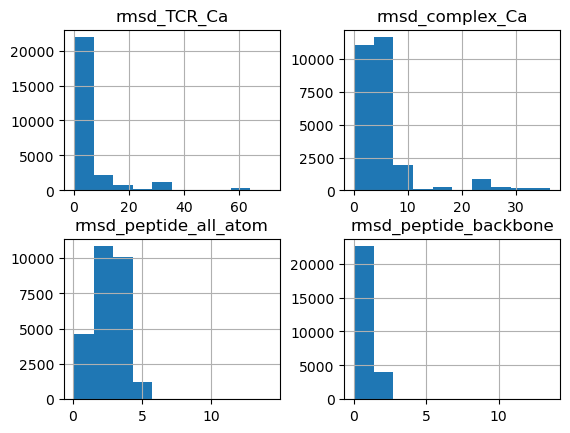

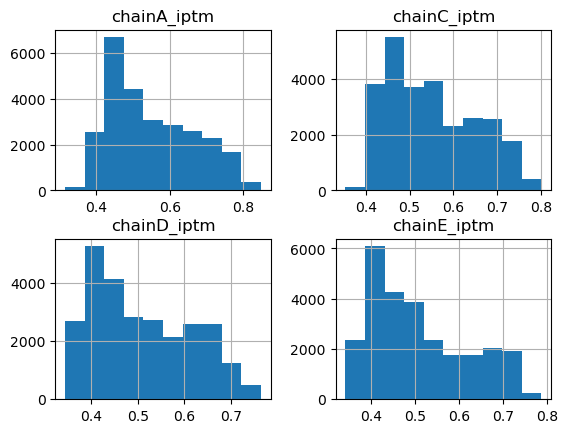

In [9]:
# View histograms
df[['rmsd_TCR_Ca', 'rmsd_complex_Ca', 'rmsd_peptide_all_atom', 'rmsd_peptide_backbone']].hist()
df[['chainA_iptm', 'chainC_iptm', 'chainD_iptm', 'chainE_iptm']].hist()

(26676, 5)
    peptide   affinity position substitution             category
0       V6E  41.938726       V6            E             Negative
26      V6G  35.089619       V6            G  Nonpolar, Aliphatic
52      V6C  23.397116       V6            C     Polar, Uncharged
78      V6Q  28.308874       V6            Q     Polar, Uncharged
104     V6H  27.190294       V6            H             Positive


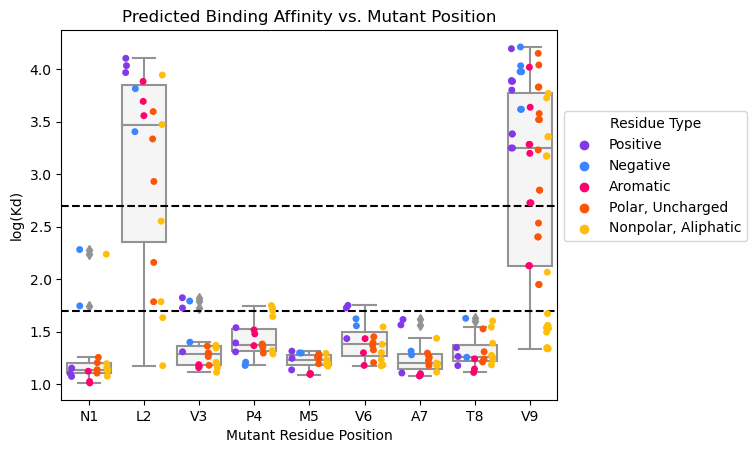

In [10]:
# Predicted binding affinity vs. mutant position plot
def categorize_substitution(x):
    nonpolar_aliphatic = ["G", "A", "V", "P", "L", "M", "I"]
    polar_uncharged = ["S", "T", "C", "N", "Q"]
    aromatic = ["F", "Y", "W"]
    positive = ["K", "R", "H"]
    negative = ["D", "E"] 
    if x in nonpolar_aliphatic:
        return "Nonpolar, Aliphatic"
    if x in polar_uncharged:
        return "Polar, Uncharged"
    if x in aromatic:
        return "Aromatic"
    if x in positive:
        return "Positive"
    if x in negative:
        return "Negative"
    
AA_cat_order = ["Positive", "Negative", "Aromatic", "Polar, Uncharged", "Nonpolar, Aliphatic"]
AA_category_colors = {
    "Nonpolar, Aliphatic": "#ffbe0b",
    "Polar, Uncharged": "#fb5607",
    "Aromatic": "#ff006e",
    "Positive": "#8338ec",
    "Negative": "#3a86ff",
}

TCR_peptide = df[['peptide','affinity']]
TCR_peptide["position"] = TCR_peptide['peptide'].apply(lambda x: x[0:2])
TCR_peptide["substitution"] = TCR_peptide['peptide'].apply(lambda x: x[2])
TCR_peptide["category"] = TCR_peptide['substitution'].apply(categorize_substitution)
print(TCR_peptide.shape)
TCR_peptide = TCR_peptide.drop_duplicates()
print(TCR_peptide.head(5))
positions_numbers = ["N1", "L2", "V3", "P4", "M5", "V6", "A7", "T8", "V9"]
TCR_peptide['log_Kd'] = np.log10(TCR_peptide['affinity'])

# sns.boxplot(x='position', y='affinity', data=TCR_peptide, order=positions_numbers, color='skyblue')
# sns.stripplot(x='position', y='affinity', data=TCR_peptide, jitter=True, color='black')
# plt.show()

sns.boxplot(x='position', y='log_Kd', data=TCR_peptide, order=positions_numbers, color="whitesmoke")
ax = sns.stripplot(x='position', y='log_Kd', hue='category', order=positions_numbers, jitter=True, data=TCR_peptide, hue_order=AA_cat_order, palette=AA_category_colors, dodge=True)
plt.legend(title='Residue Type')
ax.axhline(y=1.7, color='black', linestyle='--')
ax.axhline(y=2.7, color='black', linestyle='--')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.8))
ax.set_xlabel('Mutant Residue Position')
ax.set_ylabel('log(Kd)')
ax.set_title('Predicted Binding Affinity vs. Mutant Position')
plt.show()

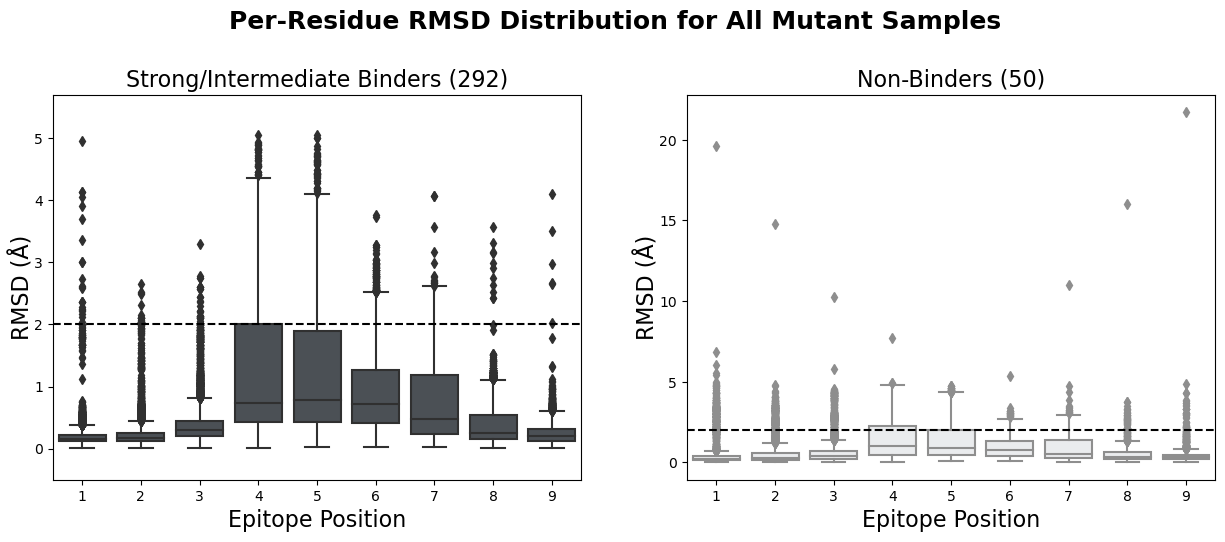

In [11]:
# RMSD vs. epitope position plot
rmsd_positions = ['rmsd_peptide_position_1',
       'rmsd_peptide_position_2', 'rmsd_peptide_position_3',
       'rmsd_peptide_position_4', 'rmsd_peptide_position_5',
       'rmsd_peptide_position_6', 'rmsd_peptide_position_7',
       'rmsd_peptide_position_8', 'rmsd_peptide_position_9']
positions_numbers = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
peptide_positions_dict = dict(zip(rmsd_positions, positions_numbers))

df_temp = df.copy()
df_temp.rename(columns=peptide_positions_dict, inplace=True)

df_nonbinder = df_temp[df_temp['presenter_category'] == 'nonbinder'].set_index('peptide')
df_strong = df_temp[df_temp['presenter_category'] == 'strong_intermediate'].set_index('peptide')

unique_nonbinder, unique_strong = len(df_nonbinder['ID'].unique()), len(df_strong['ID'].unique())

xlabel = 'Epitope Position'
ylabel = 'RMSD (\u00C5)'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(data=df_nonbinder[positions_numbers], color="#e9ecef", ax=axes[1])
axes[1].set_xlabel(xlabel, fontsize=16)
axes[1].set_ylabel(ylabel, labelpad=0.0005, fontsize=16)
axes[1].set_title(f'Non-Binders ({unique_nonbinder})', fontsize=16)
sns.boxplot(data=df_strong[positions_numbers], color="#495057", ax=axes[0])
axes[0].set_xlabel(xlabel, fontsize=16)
axes[0].set_ylabel(ylabel, labelpad=0.0005, fontsize=16)
axes[0].set_ylim(-0.5, 5.7)
axes[0].set_title(f'Strong/Intermediate Binders ({unique_strong})', fontsize=16)
axes[0].axhline(y=2, color='black', linestyle='--')
axes[1].axhline(y=2, color='black', linestyle='--')
#     axes[2].axhline(y=2, color='black', linestyle='--')
#     plt.subplots_adjust(left=0)
plt.suptitle(f"Per-Residue RMSD Distribution for All Mutant Samples", fontsize=18, y =1.05, fontweight="bold")
plt.show()

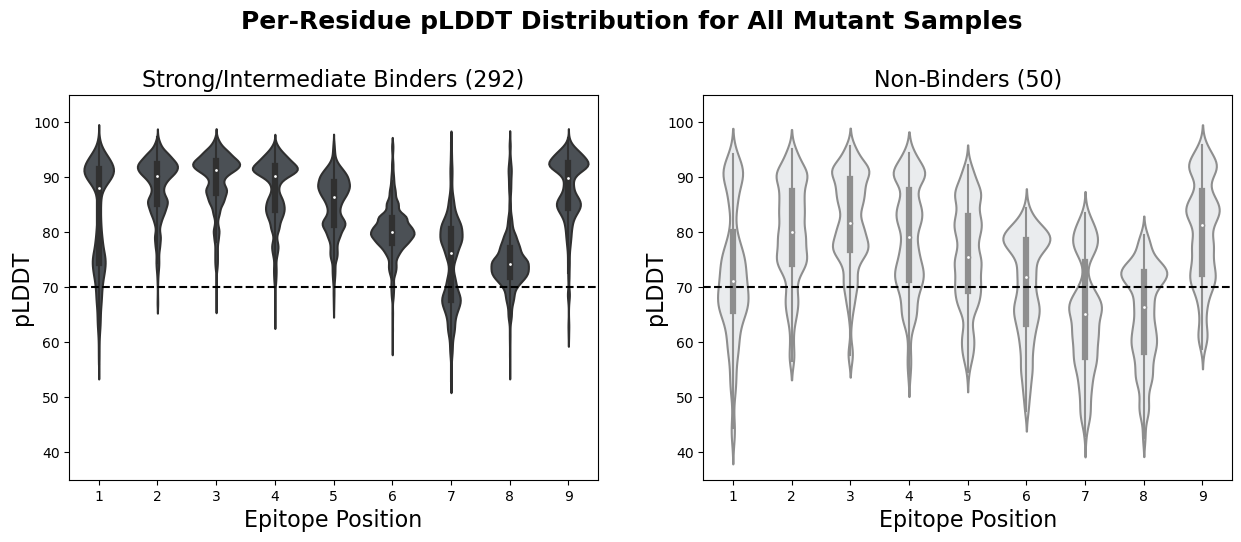

In [12]:
# pLDDT vs. epitope position plot
AF3_positions = ['A1_pLDDT', 'A2_pLDDT',
       'A3_pLDDT', 'A4_pLDDT', 'A5_pLDDT', 'A6_pLDDT', 'A7_pLDDT', 'A8_pLDDT',
       'A9_pLDDT']
positions_numbers = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
AF3_peptide_positions_dict = dict(zip(AF3_positions, positions_numbers))

AF3_df = df.copy()
AF3_df.rename(columns=AF3_peptide_positions_dict, inplace=True)

AF3_df_nonbinder = AF3_df[AF3_df['presenter_category'] == 'nonbinder'].set_index('peptide')
AF3_df_strong = AF3_df[AF3_df['presenter_category'] == 'strong_intermediate'].set_index('peptide')
unique_nonbinder, unique_strong = len(AF3_df_nonbinder['ID'].unique()), len(AF3_df_strong['ID'].unique())

xlabel = "Epitope Position"
ylabel = "pLDDT"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.violinplot(data=AF3_df_nonbinder[positions_numbers],  color="#e9ecef", ax=axes[1])
sns.violinplot(data=AF3_df_strong[positions_numbers], color="#495057", ax=axes[0])

axes[1].set_xlabel(xlabel, fontsize=16)
axes[1].set_ylabel(ylabel, labelpad=0.0005, fontsize=16)
axes[1].set_title(f'Non-Binders ({unique_nonbinder})', fontsize=16)
axes[0].set_xlabel(xlabel, fontsize=16)
axes[0].set_ylabel(ylabel, labelpad=0.0005, fontsize=16)
axes[0].set_title(f'Strong/Intermediate Binders ({unique_strong})', fontsize=16)
#     plt.subplots_adjust(left=0)
axes[0].axhline(y=70, color='black', linestyle='--')
axes[1].axhline(y=70, color='black', linestyle='--')
plt.setp(axes, ylim=(35,105))
plt.suptitle(f"Per-Residue pLDDT Distribution for All Mutant Samples", fontsize=18, y =1.05, fontweight="bold")
plt.show()

### 1.2 Data Processing

In [13]:
# Drop duplicate rows
df = df.drop_duplicates(subset=['epitope', 'rmsd_complex_Ca'], keep='last')
print('Dataframe shape after dropping duplicate rows: ', df.shape)

Dataframe shape after dropping duplicate rows:  (25650, 44)


In [14]:
### View data with missing values or invalid inputs
top_n=3 # Used for top categories with missing data
missing_column_counts = df[df.columns[df.isnull().any()]].isnull().sum()
max_idxs = np.argsort(missing_column_counts.to_numpy())[::-1][:top_n]

# Compute missing statistics
num_categories = df.isna().any(axis=0).sum()
average_per_category = df.isna().sum().sum()/len(df.columns)
total_missing_values = df.isna().sum().sum()
top_missing_categories = df.columns[max_idxs[:top_n]].to_numpy()
    
print('Number of categories with missing values: {0:.2f}'.format(num_categories))
print('Average number of missing values per category: {0:.2f}'.format(average_per_category))
print('Total number of missing values: {0:.2f}'.format(total_missing_values))
print('Top {} categories with most missing values: {}'.format(top_n, top_missing_categories))
print(df.columns[df.isnull().any()].tolist())

# Drop rows with missing values
df = df.dropna() 
print('Dataframe shape after dropping rows with missing values: ', df.shape)

Number of categories with missing values: 21.00
Average number of missing values per category: 11.93
Total number of missing values: 525.00
Top 3 categories with most missing values: ['E_average_pLDDT' 'A2_pLDDT' 'ranking_score']
['structure', 'ranking_score', 'ptm', 'iptm', 'chainA_iptm', 'chainC_iptm', 'chainD_iptm', 'chainE_iptm', 'A1_pLDDT', 'A2_pLDDT', 'A3_pLDDT', 'A4_pLDDT', 'A5_pLDDT', 'A6_pLDDT', 'A7_pLDDT', 'A8_pLDDT', 'A9_pLDDT', 'A_average_pLDDT', 'C_average_pLDDT', 'D_average_pLDDT', 'E_average_pLDDT']
Dataframe shape after dropping rows with missing values:  (25625, 44)


In [15]:
# Drop irrelevant features
df = df.drop(['ranking_score', 'rmsd_HLA_groove_all_atom', 'best_allele', 
              'structure', 'epitope', 'seed_sample', 'peptide'], axis=1)
print('Dataframe shape after dropping irrelevant features: ', df.shape)

Dataframe shape after dropping irrelevant features:  (25625, 37)


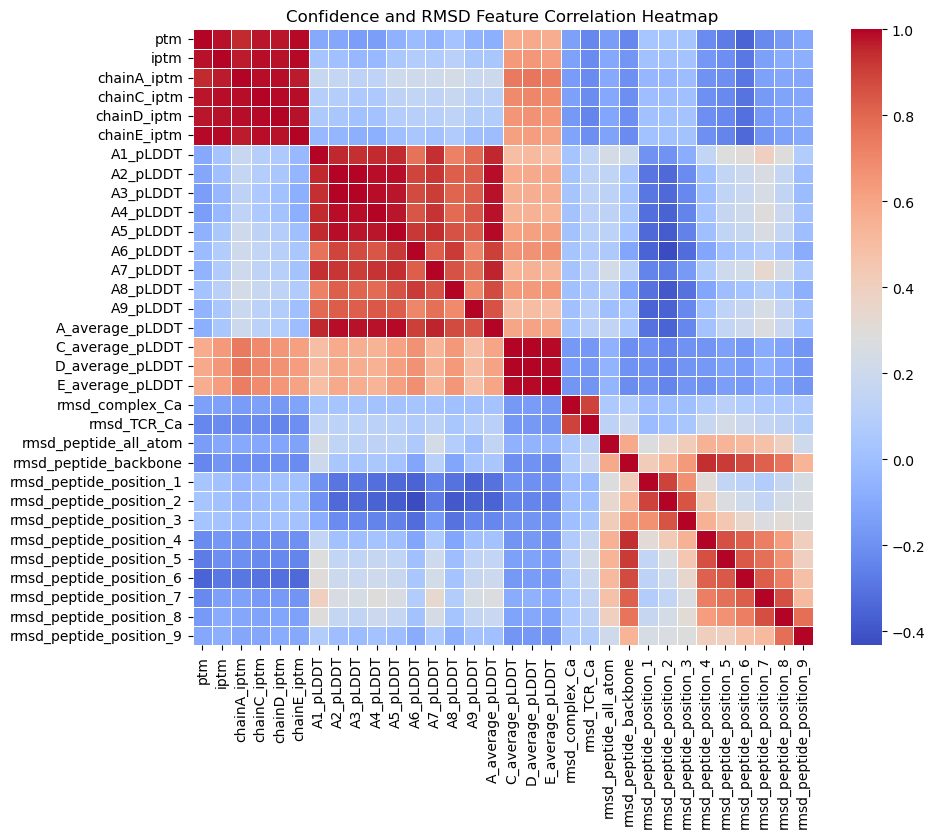

In [16]:
# Evaluate correlation between numerical features

features= ['ptm', 'iptm', 'chainA_iptm', 'chainC_iptm', 'chainD_iptm',
       'chainE_iptm', 'A1_pLDDT', 'A2_pLDDT', 'A3_pLDDT', 'A4_pLDDT',
       'A5_pLDDT', 'A6_pLDDT', 'A7_pLDDT', 'A8_pLDDT', 'A9_pLDDT',
       'A_average_pLDDT', 'C_average_pLDDT', 'D_average_pLDDT',
       'E_average_pLDDT', 'rmsd_complex_Ca', 'rmsd_TCR_Ca',
       'rmsd_peptide_all_atom', 'rmsd_peptide_backbone',
       'rmsd_peptide_position_1', 'rmsd_peptide_position_2',
       'rmsd_peptide_position_3', 'rmsd_peptide_position_4',
       'rmsd_peptide_position_5', 'rmsd_peptide_position_6',
       'rmsd_peptide_position_7', 'rmsd_peptide_position_8',
       'rmsd_peptide_position_9']
correlation = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Confidence and RMSD Feature Correlation Heatmap')
plt.show()

In [17]:
# Drop highly correlated features
features_to_drop = ['iptm', 'chainA_iptm', 'chainC_iptm', 'chainD_iptm', 'chainE_iptm', 
                    'A1_pLDDT', 'C_average_pLDDT', 'D_average_pLDDT', 'rmsd_peptide_position_1']
df = df.drop(features_to_drop, axis=1)
df.head(5)

,ptm,A2_pLDDT,A3_pLDDT,A4_pLDDT,A5_pLDDT,A6_pLDDT,A7_pLDDT,A8_pLDDT,A9_pLDDT,A_average_pLDDT,...,rmsd_peptide_position_4,rmsd_peptide_position_5,rmsd_peptide_position_6,rmsd_peptide_position_7,rmsd_peptide_position_8,rmsd_peptide_position_9,logA,obs_logC,affinity,presenter_category
1,0.554,85.0892,87.154,83.2788,80.6232,77.9708,66.6912,71.422,84.0828,78.929333,...,0.183814,0.163851,0.873525,0.517846,0.295245,0.243213,1.227824,15.549309,41.938726,strong_intermediate
2,0.554,85.0892,87.154,83.2788,80.6232,77.9708,66.6912,71.422,84.0828,78.929333,...,1.867002,1.616784,0.498737,0.595805,0.252940,0.130900,1.227824,15.549309,41.938726,strong_intermediate
3,0.554,85.0892,87.154,83.2788,80.6232,77.9708,66.6912,71.422,84.0828,78.929333,...,0.519506,0.912243,0.570504,0.355645,0.229677,0.199879,1.227824,15.549309,41.938726,strong_intermediate
4,0.554,85.0892,87.154,83.2788,80.6232,77.9708,66.6912,71.422,84.0828,78.929333,...,0.238205,0.209893,0.654984,0.537419,0.288563,0.278227,1.227824,15.549309,41.938726,strong_intermediate
5,0.554,85.0892,87.154,83.2788,80.6232,77.9708,66.6912,71.422,84.0828,78.929333,...,0.276077,0.457269,0.524265,0.295011,0.110286,0.161230,1.227824,15.549309,41.938726,strong_intermediate


In [18]:
# Feature engineering

# Average RMSD of peptide recognition region (positions 3-8)
rmsd_recognition = ['rmsd_peptide_position_3', 'rmsd_peptide_position_4',
       'rmsd_peptide_position_5', 'rmsd_peptide_position_6',
       'rmsd_peptide_position_7', 'rmsd_peptide_position_8']
df['rmsd_peptide_recognition'] = df[rmsd_recognition].mean(axis=1)

# Average pLDDT of peptide recognition region (positions 3-8)
pLDDT_recognition = ['A3_pLDDT', 'A4_pLDDT',
       'A5_pLDDT', 'A6_pLDDT', 'A7_pLDDT', 'A8_pLDDT']
df['pLDDT_recognition'] = df[pLDDT_recognition].mean(axis=1)

# Drop averaged features
df = df.drop(rmsd_recognition, axis=1) 
df = df.drop(pLDDT_recognition, axis=1)

In [19]:
# Drop features with experimental values used to generate target binary labels
experimental_features = ['logA', 'obs_logC', 'affinity']
df = df.drop(experimental_features, axis=1) 

In [20]:
# Separate dataframe into numerical and categorical features
df_numerical = df.select_dtypes(include=['number'])
print("Numerical Features:\n", df_numerical.columns)

df_categorical = df.select_dtypes(include=['object'])
print("Categorical Features:\n", df_categorical.columns)

Numerical Features:
 Index(['ptm', 'A2_pLDDT', 'A9_pLDDT', 'A_average_pLDDT', 'E_average_pLDDT',
       'ID', 'rmsd_complex_Ca', 'rmsd_TCR_Ca', 'rmsd_peptide_all_atom',
       'rmsd_peptide_backbone', 'rmsd_peptide_position_2',
       'rmsd_peptide_position_9', 'rmsd_peptide_recognition',
       'pLDDT_recognition'],
      dtype='object')
Categorical Features:
 Index(['presenter_category'], dtype='object')


array([[<Axes: title={'center': 'rmsd_peptide_recognition_std'}>,
        <Axes: title={'center': 'pLDDT_recognition_std'}>]], dtype=object)

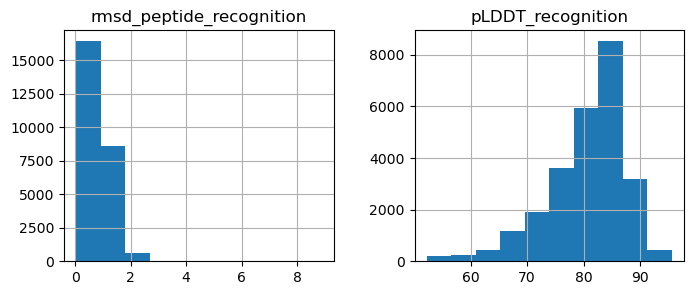

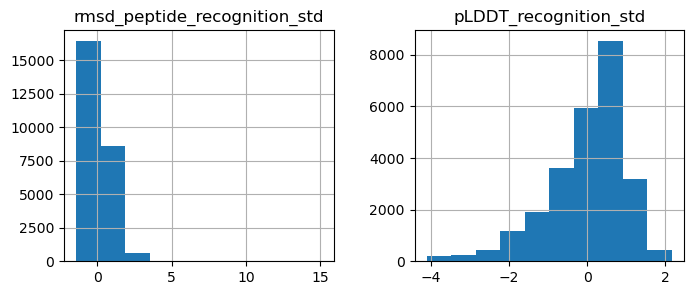

In [21]:
# Standardize numerical features
df_numerical[['rmsd_peptide_recognition', 'pLDDT_recognition']].hist(figsize=(8,3))
df_numerical_std = pd.DataFrame()
for feature in df_numerical:
    df_numerical_std[feature+'_std'] = (df_numerical[feature] - df_numerical[feature].mean()) / df_numerical[feature].std()
df_numerical_std[['rmsd_peptide_recognition_std', 'pLDDT_recognition_std']].hist(figsize=(8,3))

In [22]:
# Encode categorical target (MHC presentation)
target_feature = 'presenter_category'
enc = OrdinalEncoder()
df_categorical_encoded = pd.DataFrame()
df_categorical_encoded[[target_feature+'_target']] = enc.fit_transform(df_categorical[[target_feature]])
df_categorical_encoded['presenter_category_target'].value_counts()

presenter_category_target
1.0    21875
0.0     3750
Name: count, dtype: int64

In [23]:
print(df_numerical_std.shape, df_categorical_encoded.shape)
print(df_numerical_std.isnull().sum().sum())
print(df_categorical_encoded.isnull().sum().sum()) # check for missing values

(25625, 14) (25625, 1)
0
0


In [24]:
df_processed = pd.concat([df_numerical_std.reset_index(drop=True),df_categorical_encoded.reset_index(drop=True)], axis=1)
print(df_processed.isnull().sum().sum()) # check for missing values

0


## 2. Methods

### 2.1 Naive Bayes Classification

Code for naive Bayes adapted from class and homework notes.

In [25]:
def Bayes_predict_logprob(X, W, W_prior):
    '''
    Computes the log probability of each class given input features.
    Input:
        - X: input features
        - W: model weights
        - W_prior: weight prior probabilities
    Output:
        - y_pred: probability of positive product review
    '''
    y_pred=None
    # Compute log probability using dot product of features 
    #   with log of class conditional probabilities
    y_pred = np.dot(X, np.log(W.T))
    # Add log prior probabilities of classes
    y_pred += np.log(W_prior)
    return y_pred

In [26]:
def Bayes_predict_probability(X, W, W_prior, classes):
    '''
    Produces probabilistic estimate for P(y_i = +1 | x_i)
        Estimate ranges between 0 and 1.
    Input:
        - X: Input features
        - W: model weights
        - W_prior: weight prior probabilities
        - classes: class labels for input features
    Output:
        - y_pred: probability of positive product review
    '''
    y_pred=None
        
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    # Identify index for positive class
    pos_class_idx = np.where(classes == 1)[0][0]
    # Get log probabilities
    y_pred = Bayes_predict_logprob(X, W, W_prior)
    # Convert log probabilities to probabilities using the softmax function
    probs = np.exp(np.array(y_pred))
    probs = np.exp(probs) / np.sum(np.exp(probs),axis=1)[:, None]
    # Extract probability of positive class
    y_pred = probs[:, pos_class_idx]
    return y_pred

In [27]:
def Bayes_predict(X, W, W_prior, classes):
    '''
    Hypothetical function  h(x)
    Input: 
        - X: Input features
        - W: model weights
        - W_prior: weight prior probabilities 
        - classes: class labels for input features
    Output:
        - y_pred: list of predicted classes 
    '''
    y_pred=None
    # Compute log probabilities
    y_pred = Bayes_predict_logprob(X, W, W_prior)
    # Select class with highest probability
    y_pred = np.argmax(y_pred, axis=1)
    # Convert indices to class labels
    mapping = {i: k for i, k in enumerate(classes)}
    idx_to_class = np.vectorize(mapping.get)
    y_pred = idx_to_class(y_pred)
    return y_pred

In [28]:
def Bayes_fit(X, Y, alpha=1):
    '''
    Compute closed-form solution for Naive Bayes classifier
    Input: 
        - X: Input features
        - Y: list of actual product sentiment classes 
    Output:
        - W: predicted weights
        - W_prior: prior
        - likelihood_history: word likelihood (float)
    '''
    # Number of examples, Number of features
    num_examples, num_features = X.shape
    classes = np.unique(np.ravel(Y))
    num_classes = len(classes)
    # Initialization: weights, prior, likelihood
    W = np.zeros((num_classes, num_features))
    W_prior = np.zeros(num_classes)
    likelihood_history=[]

    # closed-form solution for model parameters
    # Compute class-conditional probabilities and class priors
    for ind, class_k in enumerate(classes):
        # Select samples belonging to class_k
        X_class_k = X[Y == class_k]
        # Compute likelihood using Laplace smoothing
        W[ind] = (np.sum(X_class_k, axis=0) + alpha)
        W[ind] /= (np.sum(X_class_k) + (alpha * X_class_k.shape[-1]))
        # Compute prior
        W_prior[ind] = X_class_k.shape[0] / num_examples
    
    # Compute and store log likelihood history
    log_likelihood = np.log(Bayes_predict_probability(X, W, W_prior, classes)).mean()
    likelihood_history.append(log_likelihood)
    return W, W_prior, likelihood_history

### 2.2 Support Vector Machines

Code for SVM adapted from class and homework notes.

In [29]:
def SVM_predict_score(X, W, b):
    '''
    Produces raw decision values before thresholding.
    Input:
        - X: Input features
        - W: model weights
        - b: model bias
    Output:
        - scores: Raw SVM decision values
    '''
    scores = np.dot(X, W) + b
    return scores

In [30]:
def SVM_compute_hinge_loss(X, Y, W, b, lambda_param):
    '''
    Compute the hinge loss for SVM using X, Y, and W
    Inputs:
        - X: Input features
        - Y: Ground truth labels
        - W: Model weights
        - b: Model bias
        - lambda_param: Lagrange multipliers 
    Outputs:
        - loss: hinge loss
    '''
    margins = 1 - Y * SVM_predict_score(X, W, b)
    margins = np.maximum(0, margins)
    loss = np.mean(margins) + (lambda_param / 2) * np.sum(W ** 2)
    return loss

In [31]:
def SVM_predict(X, W, b):
    '''
    Predicts class labels using the trained SVM model.
    Input:
        - X: Input features
        - W: Model weights
        - b: Model bias
    Output:
        - y_pred: List of predicted classes (-1 or +1)
    '''
    scores = SVM_predict_score(X, W, b)
    y_pred = np.where(scores >= 0, +1, 0)
    return y_pred

In [32]:
def SVM_fit(X, Y, lambda_param, learning_rate, num_iterations):
    '''
    Compute SVM derivative using gradient descent and update weights.
    Input:
        - X: Input features
        - Y: True labels
        - lambda_param: Lagrange multipliers 
        - learning_rate: learning rate
        - num_iterations: Number of iterations to update weights in gradient descent
    Output:
        - W: weights
        - b: bias
        - likelihood_history: hinge loss
    '''
    num_examples, num_features = X.shape
    W = np.zeros(num_features)
    b = 0
    likelihood_history = []
    
    # Train SVM using gradient descent
    for _ in range(num_iterations):
        scores = SVM_predict_score(X, W, b)
        indicator = (Y * scores) < 1
        
        dW = (-np.dot(X.T, (Y * indicator)) + (2 * lambda_param * W )) / num_examples
        db = -np.sum(Y * indicator) / num_examples
        
        W -= learning_rate * dW
        b -= learning_rate * db
        
        loss = SVM_compute_hinge_loss(X, Y, W, b, lambda_param)
        likelihood_history.append(-loss)
    return W, b, likelihood_history

### 2.3 Train-Test Split

In [33]:
# Split training and test data
X, y = df_processed.loc[:, ~df_processed.columns.isin(['presenter_category_target'])], \
    df_processed.loc[:, df_processed.columns.isin(['presenter_category_target'])]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

print('Training set size: {}'.format(len(X_train)))
print('Test set size: {}'.format(len(X_test)))

Training set size: 20500
Test set size: 5125


In [34]:
from sklearn.decomposition import PCA

# Reduce variables to 6 with PCA
num_comps = 6
if len(X_train) > 0:
    pca = PCA(n_components=num_comps)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
if len(X_test) > 0:
    pca.fit(X_test)
    X_test = pca.transform(X_test)
    
# naive Bayes results in negative values; make all values positive
X_train_Bayes = X_train - X_train.min()
X_test_Bayes = X_test - X_test.min()

# Observe number of features in training and test sets after PCA
print('SVM training set size: {}'.format(X_train.shape))
print('SVM test set size: {}'.format(X_test.shape))
print('Naive Bayes training set size: {}'.format(X_train_Bayes.shape))
print('Naive Bayes test set size: {}'.format(X_test_Bayes.shape))

SVM training set size: (20500, 6)
SVM test set size: (5125, 6)
Naive Bayes training set size: (20500, 6)
Naive Bayes test set size: (5125, 6)


### 2.4 k-Fold Cross-Validation

In [35]:
def k_fold_cross_validation(X_train_data, k=5):
    """
    Performs k-fold cross-validation.
    Input:
        - X_train_data: Feature training data
        - k: Number of folds
    Output:
        list: A list of tuples, where each tuple contains:
            - train_indices: Indices for the training
            - test_indices: Indices for the test
    """
    num_samples = len(X_train_data)
    print(num_samples)
    fold_size = num_samples // k
    indices = np.arange(num_samples)
    np.random.shuffle(indices)  

    folds = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        val_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        folds.append((train_indices, val_indices))
    return folds

In [36]:
# Get fold indices for training and validation sets
fold_indices = k_fold_cross_validation(X_train)
print(fold_indices)

20500
[(array([20292,   325, 12693, ...,  4645,  7167,  4223]), array([ 4976, 18309,  8174, ...,  6477,  6848,  4298])), (array([ 4976, 18309,  8174, ...,  4645,  7167,  4223]), array([20292,   325, 12693, ...,  6926, 19104,  5110])), (array([ 4976, 18309,  8174, ...,  4645,  7167,  4223]), array([10368, 12772,  6510, ...,  4010, 13699,  4345])), (array([ 4976, 18309,  8174, ...,  4645,  7167,  4223]), array([  563,  3308, 18122, ...,  7445, 18428,  7981])), (array([ 4976, 18309,  8174, ...,  7445, 18428,  7981]), array([10285,  3404, 17312, ...,  4645,  7167,  4223]))]


## 3. Model Evaluation Metrics

In [37]:
def get_evaluation_metrics(prediction_labels, true_labels): 
    # calculate accuracy
    num_correct = np.sum(prediction_labels == true_labels)
    accuracy = num_correct / len(true_labels) 
    
    # construct confusion matrix                      
    cmatrix = confusion_matrix(true_labels, prediction_labels)
    true_neg, false_pos, false_neg, true_pos = cmatrix.ravel()
    
    # calculate precision
    precision = true_pos / (true_pos + false_pos)
    
    # calculate recall
    recall = true_pos / (true_pos + false_neg)
    
    # calculate F1 score
    F1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, F1_score 

In [38]:
evaluation_metrics = ['accuracy', 'precision', 'recall', 'F1_score']

### 4. Model Training, Cross-Validation, and Testing

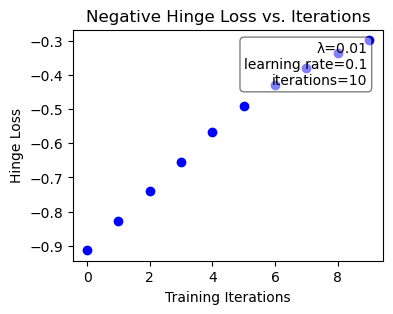

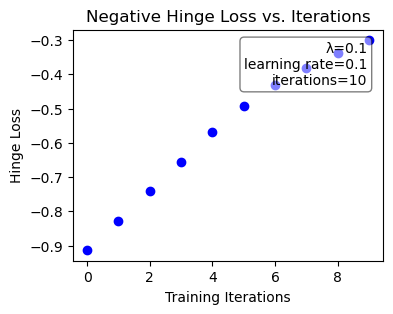

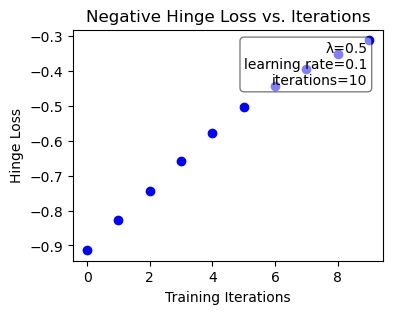

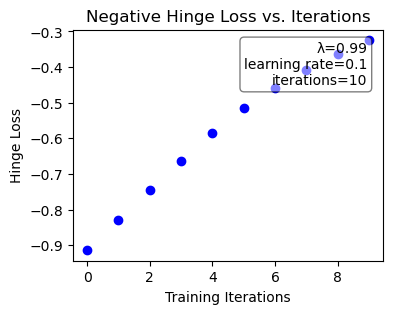

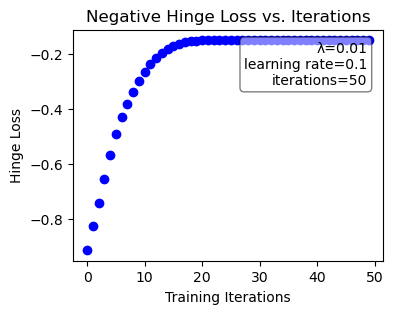

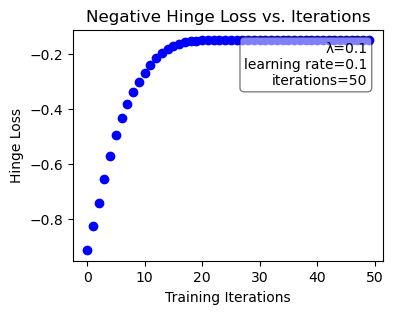

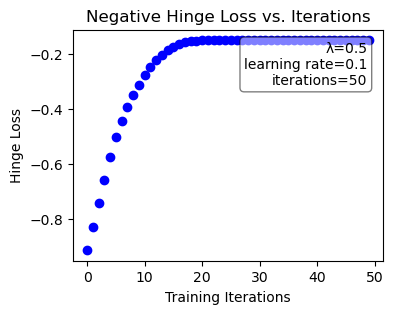

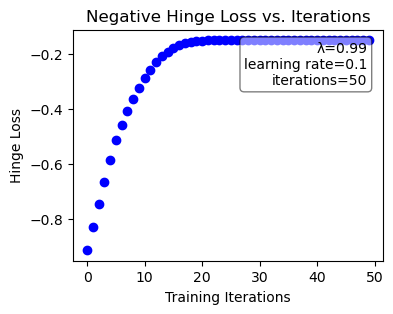

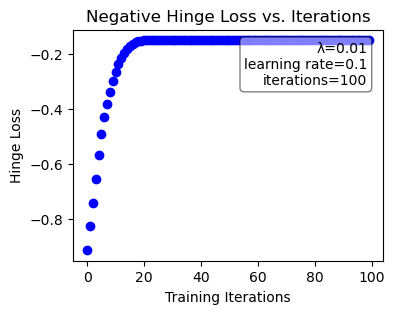

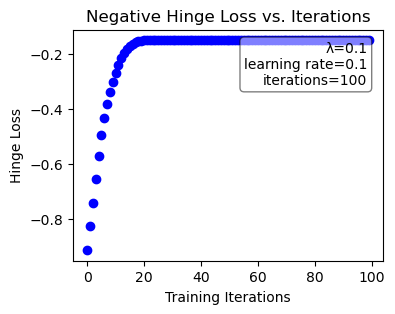

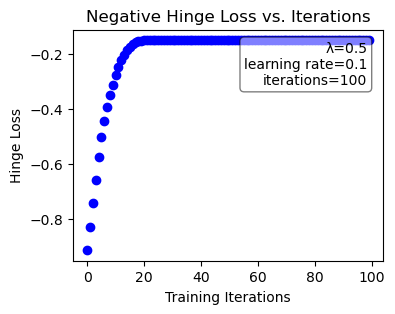

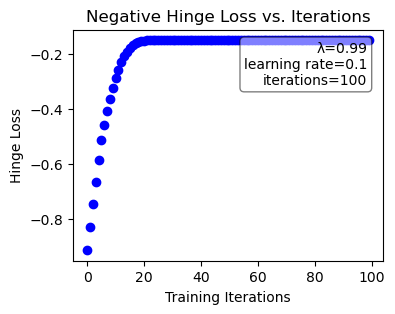

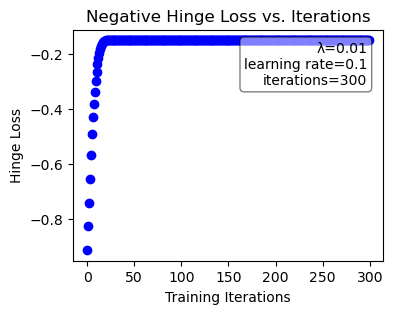

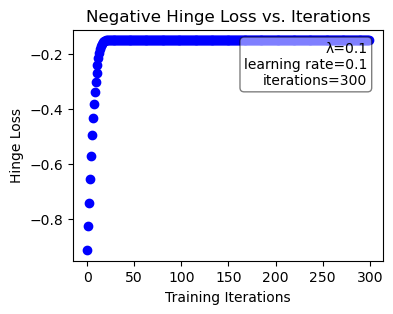

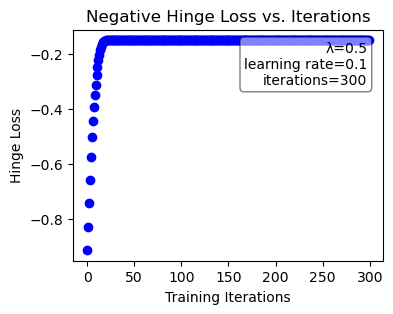

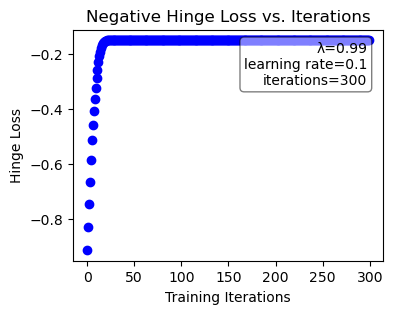

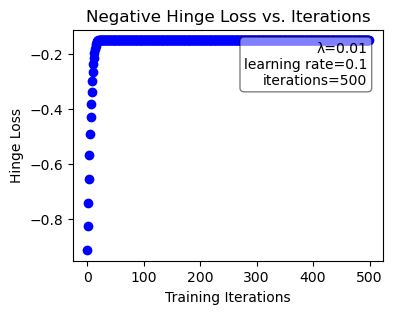

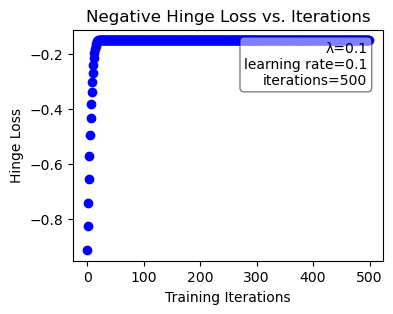

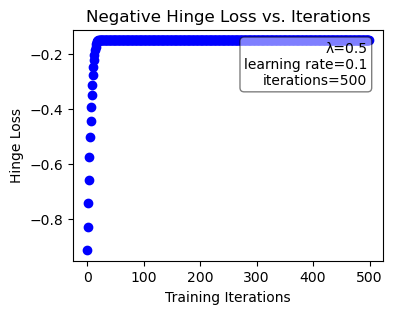

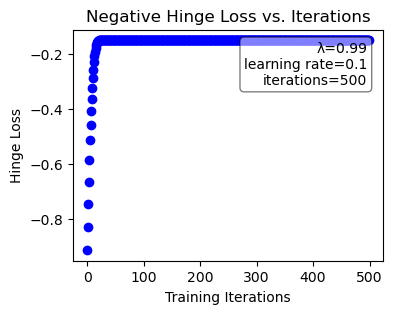

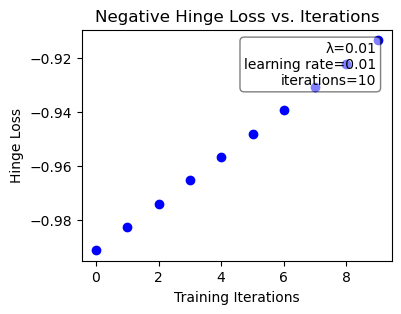

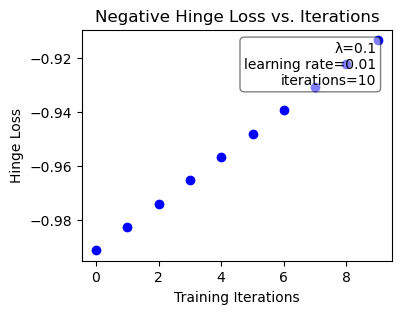

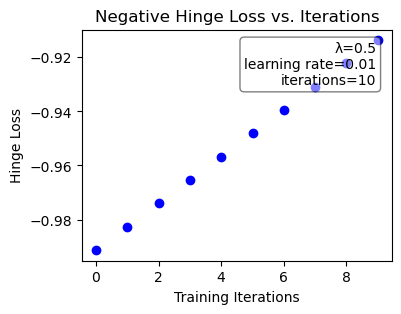

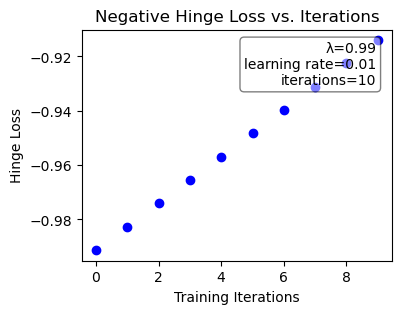

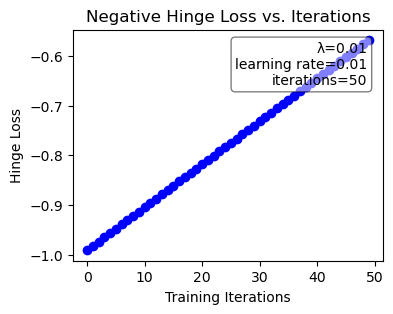

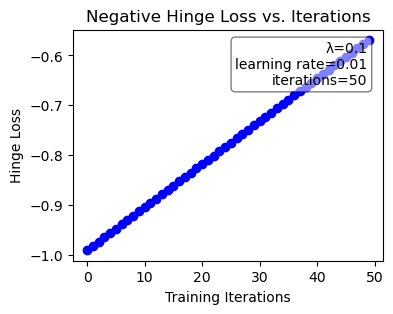

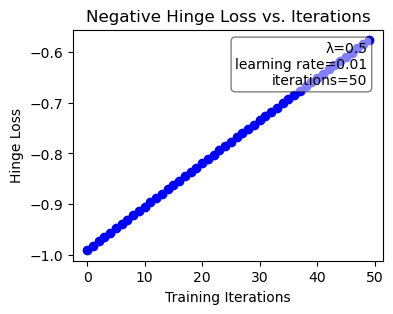

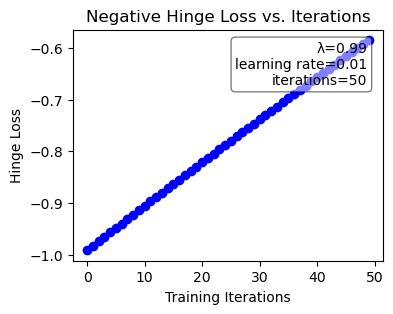

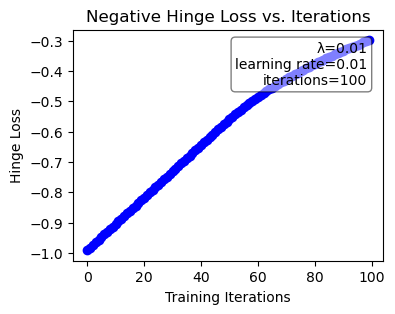

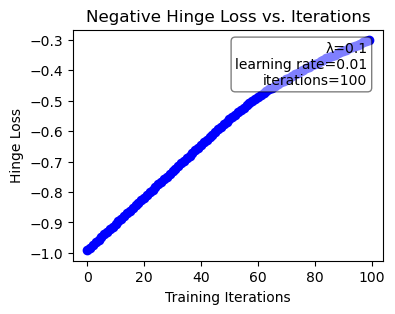

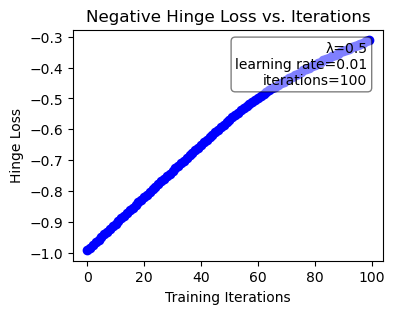

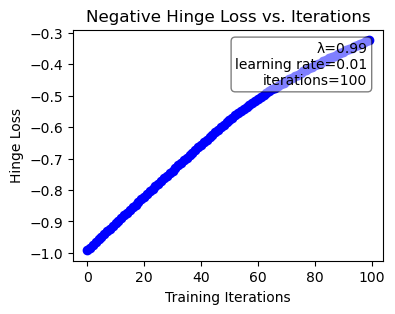

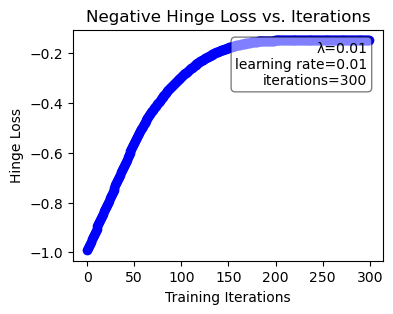

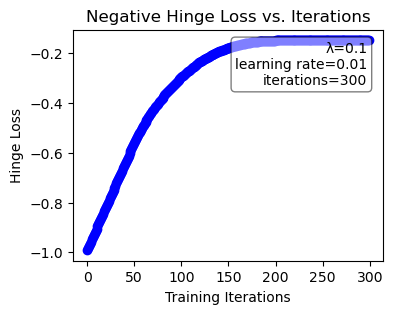

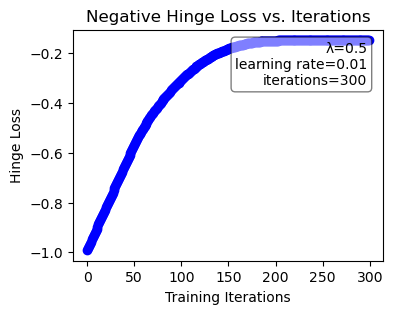

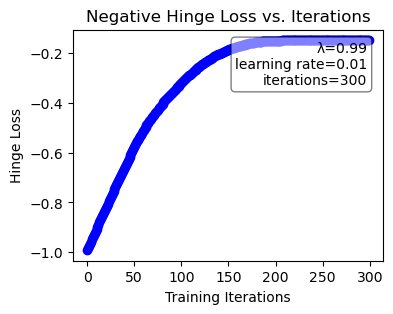

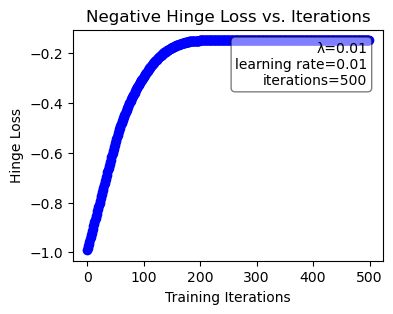

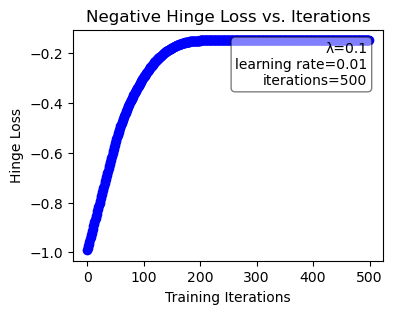

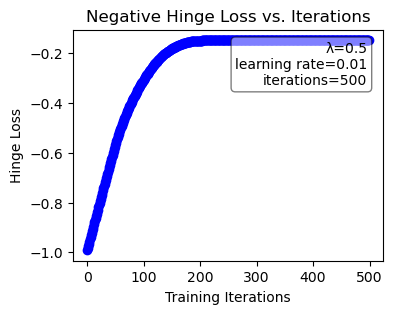

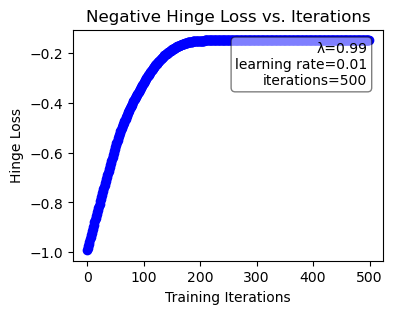

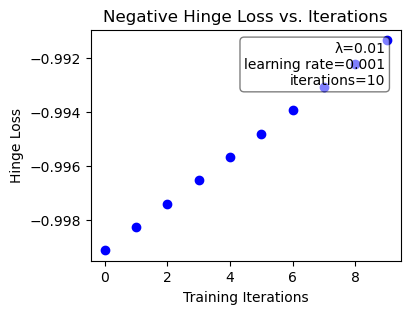

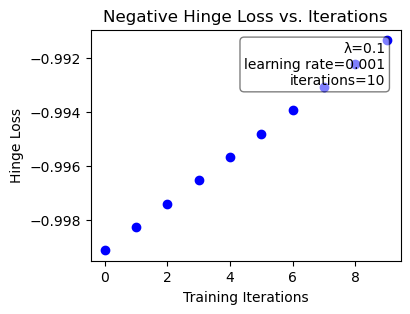

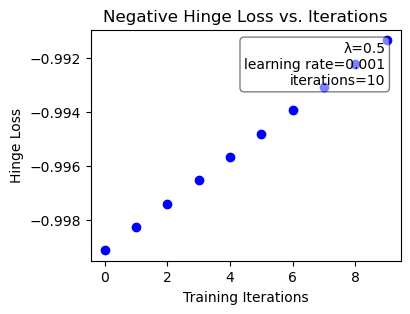

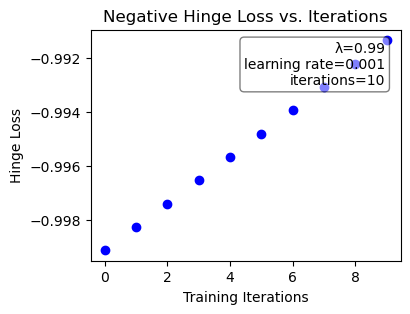

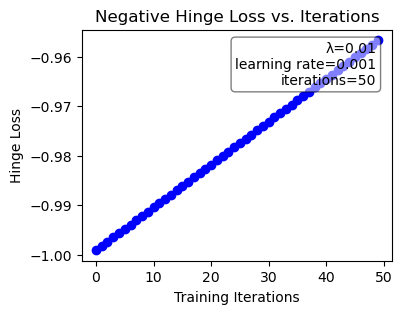

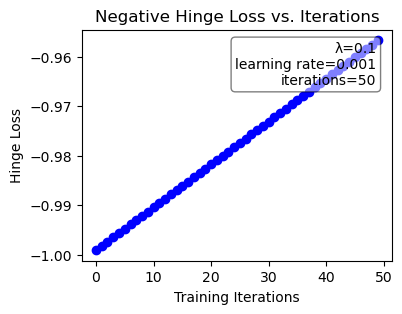

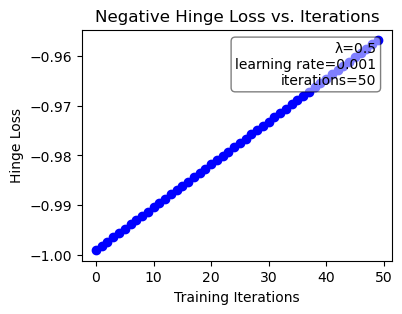

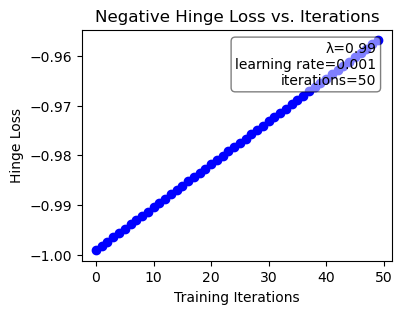

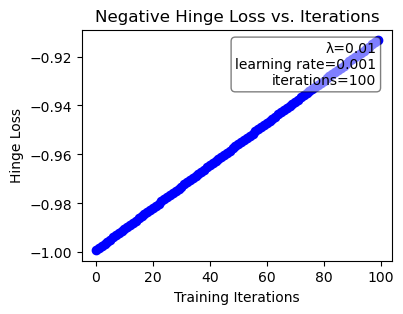

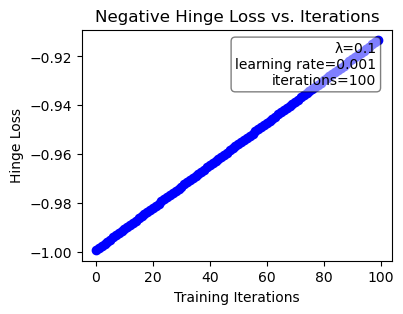

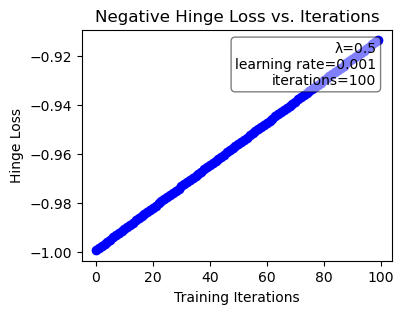

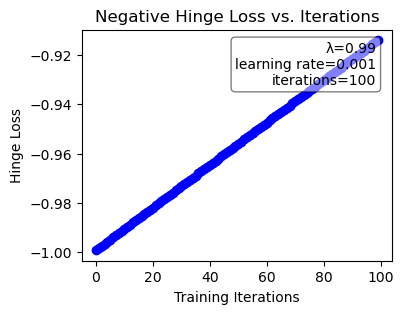

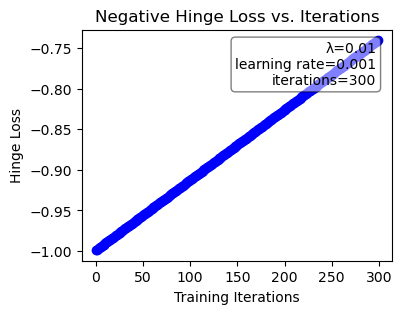

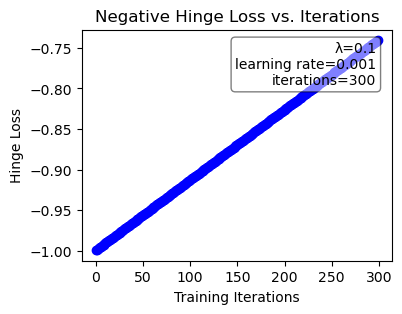

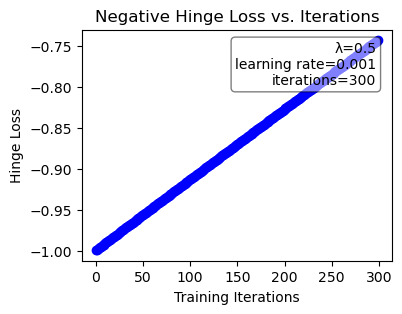

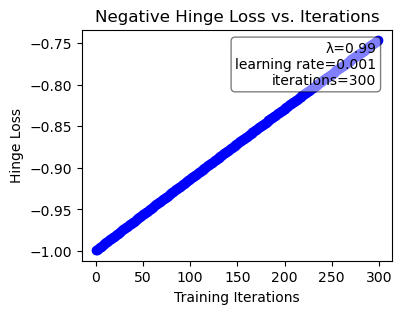

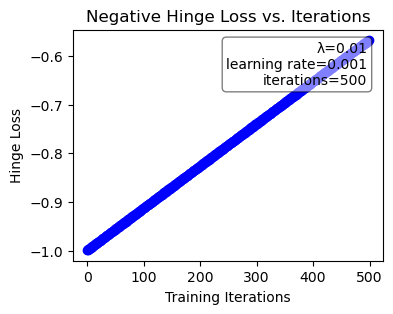

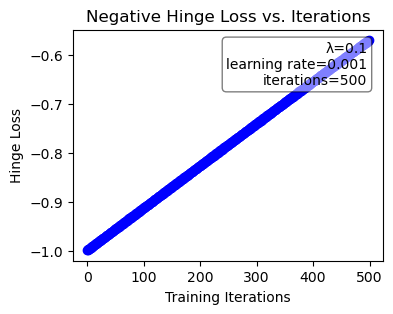

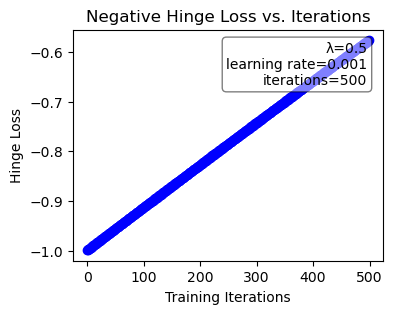

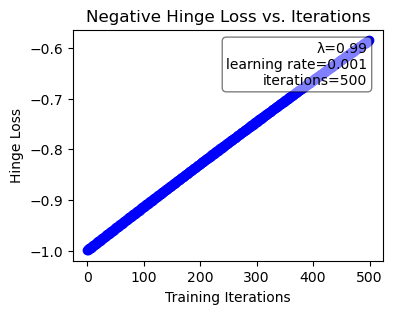

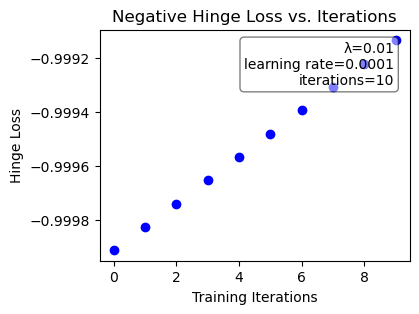

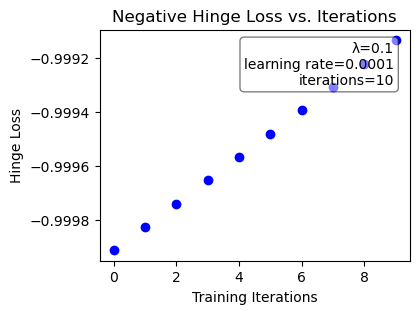

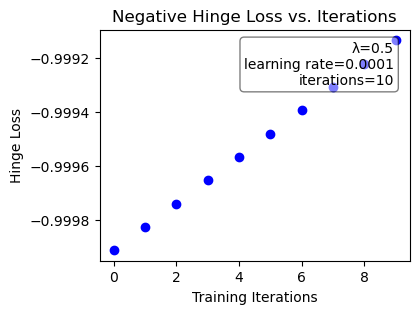

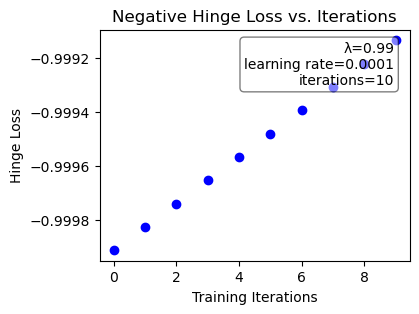

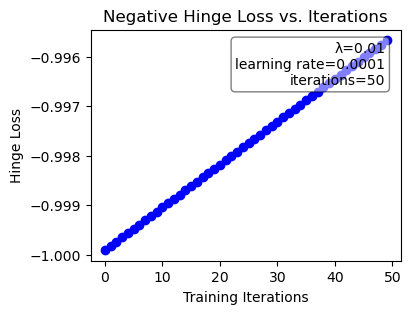

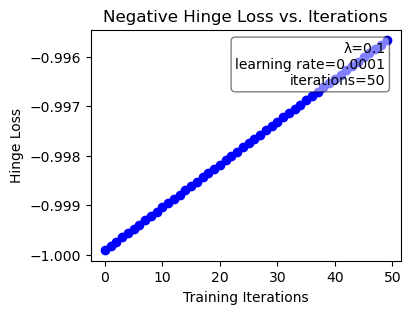

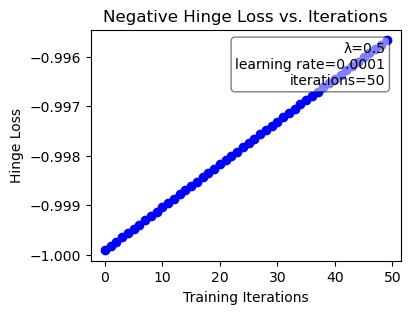

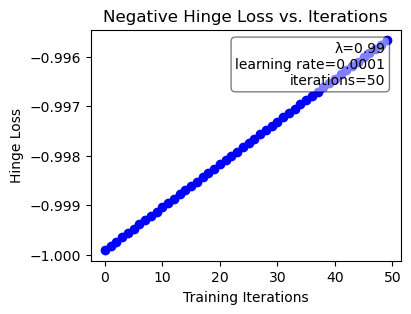

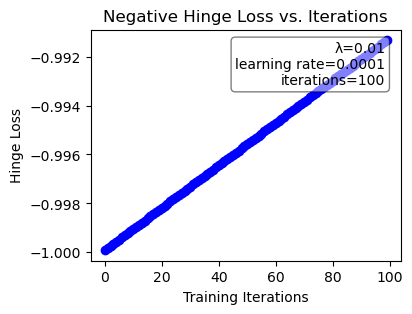

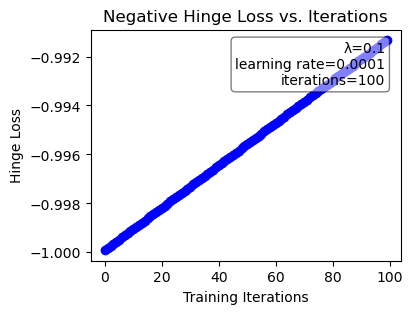

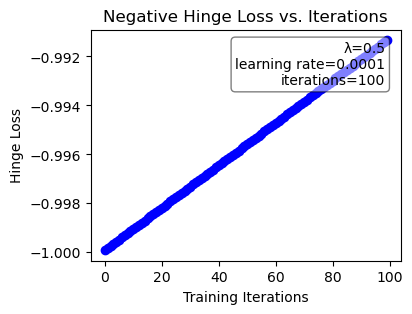

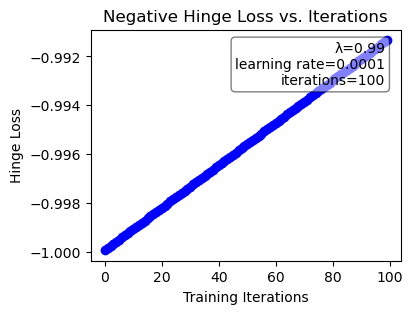

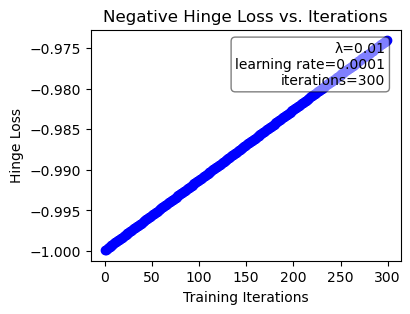

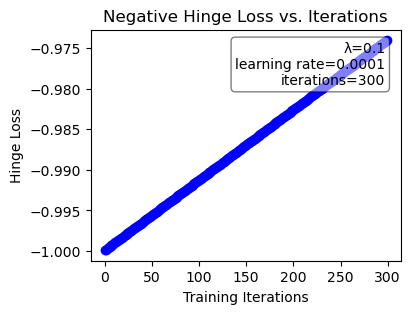

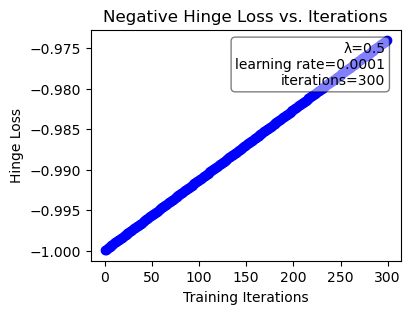

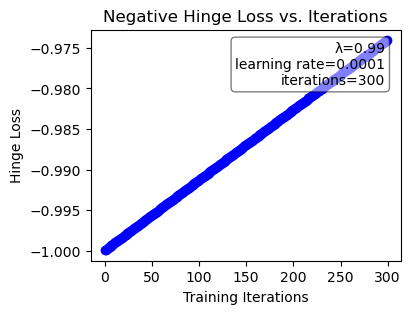

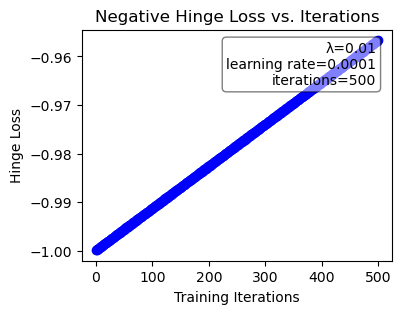

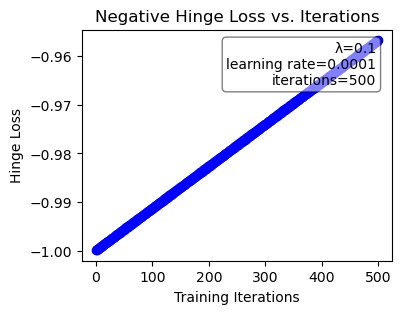

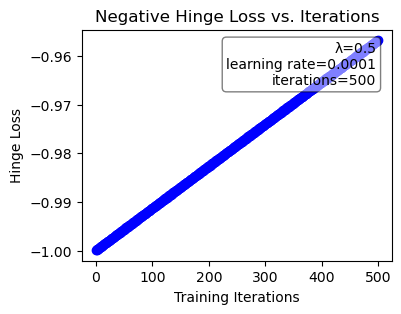

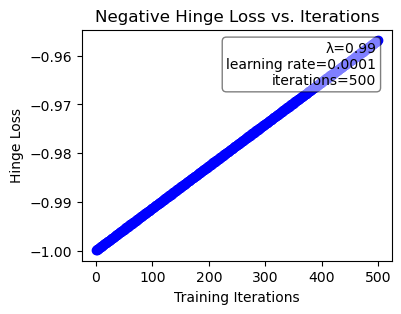

In [39]:
# Cross-validation and hyperparameter tuning for SVM

SVM_learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
SVM_num_iterations = [10, 50, 100, 300, 500]
SVM_lambda_params = [0.01, 0.1, 0.5, 0.99]

SVM_hyperparameter_combinations, SVM_average_train_metrics, SVM_average_val_metrics = [], [], []

# Fine-tune SVM hyperparameters
for rate in SVM_learning_rates:
    for iterations in SVM_num_iterations:
        for lambda_param in SVM_lambda_params:
            SVM_hyperparameter_combinations.append([rate, iterations, lambda_param])
            
            # Perform cross-validation on each hyperparameter combination
            SVM_cross_validation_train_metrics, SVM_cross_validation_val_metrics = [], []
            
            for train_indices, val_indices in fold_indices:
                X_train_temp, y_train_temp = X_train[train_indices], y_train.iloc[train_indices]
                X_val_temp, y_val_temp = X_train[val_indices], y_train.iloc[val_indices]

                SVM_model_weights_check, SVM_model_bias_check, SVM_likelihood_history = SVM_fit(X_train_temp,np.ravel(y_train_temp),
                                                                   lambda_param, rate, iterations)
                SVM_train_prediction_labels = SVM_predict(X_train_temp, SVM_model_weights_check, SVM_model_bias_check)
                SVM_val_prediction_labels = SVM_predict(X_val_temp, SVM_model_weights_check, SVM_model_bias_check)

                SVM_cross_validation_train_metrics.append(list(get_evaluation_metrics(SVM_train_prediction_labels, np.ravel(y_train_temp))))
                SVM_cross_validation_val_metrics.append(list(get_evaluation_metrics(SVM_val_prediction_labels, np.ravel(y_val_temp))))
            
            # Plot hinge loss
            plt.figure(figsize=(4, 3))
            plt.scatter(np.arange(0,len(SVM_likelihood_history),1), SVM_likelihood_history, color = 'blue') 
            plt.title('Negative Hinge Loss vs. Iterations') 
            plt.xlabel('Training Iterations') 
            plt.ylabel('Hinge Loss') 
            
            text_str = f'\u03BB={lambda_param}\nlearning rate={rate}\niterations={iterations}'
            plt.text(0.95, 0.95, text_str,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform=plt.gca().transAxes,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
            plt.show() 
            
            # Print average evaluation metrics after cross-validation
            SVM_average_train_metrics.append(np.mean(np.array(SVM_cross_validation_train_metrics), axis=0))
            SVM_average_val_metrics.append(np.mean(np.array(SVM_cross_validation_val_metrics), axis=0))

In [41]:
for i, metric in enumerate(evaluation_metrics):
    print(metric)
    SVM_train_metric_scores = list(subarray[i] for subarray in SVM_average_train_metrics)
    SVM_val_metric_scores = list(subarray[i] for subarray in SVM_average_val_metrics)

    # Determmining max/min score and index of max/min score for training and validation sets
    max_SVM_train_metric_scores = max(SVM_train_metric_scores)
    max_SVM_val_metric_scores = max(SVM_val_metric_scores)
    min_SVM_val_metric_scores = min(SVM_val_metric_scores)

    index_max_SVM_train_metric_scores = [x for x, subarray in enumerate(SVM_average_train_metrics) \
                                         if subarray[i] == max_SVM_train_metric_scores]
    index_max_SVM_val_metric_scores = [x for x, subarray in enumerate(SVM_average_val_metrics) \
                                       if subarray[i] == max_SVM_val_metric_scores]

    index_min_SVM_val_metric_scores = [x for x, subarray in enumerate(SVM_average_val_metrics) \
                                       if subarray[i] == min_SVM_val_metric_scores]

    # Finding hyperparameter combinations corresponding to max/min scores
    train = [SVM_hyperparameter_combinations[i] for i in index_max_SVM_train_metric_scores]
    val_max = [SVM_hyperparameter_combinations[i] for i in index_max_SVM_val_metric_scores]
    val_min = [SVM_hyperparameter_combinations[i] for i in index_min_SVM_val_metric_scores]

#     print(f'Maximal {metric} for training: {max_SVM_train_metric_scores} at hyperparameters {train} \
#     ({len(train_alpha)} combinations)')
    print(f'Maximal {metric} for validation: {max_SVM_val_metric_scores} at hyperparameters {val_max} \
    ({len(train)} combinations)')
    print(f'Minimal {metric} for validation: {min_SVM_val_metric_scores} at hyperparameters {val_min} \
    ({len(train)} combinations)')
    print('#########################################################################################################')

accuracy
Maximal accuracy for validation: 0.8960487804878049 at hyperparameters [[0.1, 10, 0.01], [0.1, 10, 0.1], [0.1, 10, 0.5], [0.1, 10, 0.99]]     (4 combinations)
Minimal accuracy for validation: 0.8537073170731707 at hyperparameters [[0.1, 50, 0.01], [0.1, 50, 0.1], [0.1, 50, 0.5], [0.1, 50, 0.99], [0.1, 100, 0.01], [0.1, 100, 0.1], [0.1, 100, 0.5], [0.1, 100, 0.99], [0.1, 300, 0.01], [0.1, 300, 0.1], [0.1, 300, 0.5], [0.1, 300, 0.99], [0.1, 500, 0.01], [0.1, 500, 0.1], [0.1, 500, 0.5], [0.1, 500, 0.99], [0.01, 500, 0.01], [0.01, 500, 0.1], [0.01, 500, 0.5], [0.01, 500, 0.99]]     (4 combinations)
#########################################################################################################
precision
Maximal precision for validation: 0.9151214280780937 at hyperparameters [[0.01, 10, 0.01], [0.01, 10, 0.1], [0.01, 10, 0.5], [0.01, 10, 0.99], [0.001, 10, 0.01], [0.001, 10, 0.1], [0.001, 10, 0.5], [0.001, 10, 0.99], [0.001, 50, 0.01], [0.001, 50, 0.1], [0.001, 50, 0.5], [

In [42]:
# Fitting SVM model with training data using learning rate = 0.1, lambda = 0.5, iterations = 10
SVM_model_weights_check, SVM_model_bias_check, SVM_likelihood_history = SVM_fit(X_train,np.ravel(y_train),
                                                                   0.5, 0.1, 10)

# Testing SVM model with testing data 
SVM_test_prediction_labels = SVM_predict(X_test, SVM_model_weights_check, SVM_model_bias_check)

# Calculating evaluation metrics for predictions with test data
SVM_test_evaluation = list(get_evaluation_metrics(SVM_test_prediction_labels, np.array(np.ravel(y_test))))

print(SVM_test_evaluation)

[0.8928780487804878, 0.8986866791744841, 0.98559670781893, 0.9401373895976448]


In [43]:
# Cross-validation and hyperparameter tuning for naive Bayes
# training: X_train_Bayes
# test: X_test_Bayes

alpha_values = [0.001, 0.1, 1, 10, 100, 1000, 10000]
Bayes_average_train_metrics, Bayes_average_val_metrics = [], []

# Screen alpha values
for alpha_value in alpha_values:
    print(alpha_value)

    # Perform cross-validation on each hyperparameter combination
    Bayes_cross_validation_train_metrics = []
    Bayes_cross_validation_val_metrics = []
    for train_indices, val_indices in fold_indices:
        X_train_temp, y_train_temp = X_train_Bayes[train_indices], y_train.iloc[train_indices]
        X_val_temp, y_val_temp = X_train_Bayes[val_indices], y_train.iloc[val_indices]


        Bayes_model_weights, Bayes_model_weights_prior, Bayes_likelihood_history = \
            Bayes_fit(X_train_temp, np.ravel(y_train_temp), alpha_value)
        Bayes_train_prediction_labels = Bayes_predict(X_train_temp, 
                                                       Bayes_model_weights, 
                                                       Bayes_model_weights_prior, 
                                                       np.unique(np.ravel(y_train_temp)))
        Bayes_val_prediction_labels = Bayes_predict(X_val_temp, 
                                                       Bayes_model_weights, 
                                                       Bayes_model_weights_prior, 
                                                       np.unique(np.ravel(y_val_temp)))

        Bayes_cross_validation_train_metrics.append(list(get_evaluation_metrics(Bayes_train_prediction_labels,
                                                                          np.ravel(y_train_temp))))
        Bayes_cross_validation_val_metrics.append(list(get_evaluation_metrics(Bayes_val_prediction_labels,
                                                                        np.ravel(y_val_temp))))

    # Print average evaluation metrics after cross-validation
    Bayes_average_train_metrics.append(list(np.mean(np.array(Bayes_cross_validation_train_metrics), axis=0)))
    Bayes_average_val_metrics.append(np.mean(np.array(Bayes_cross_validation_val_metrics), axis=0))

0.001
0.1
1
10
100
1000
10000


In [45]:
for i, metric in enumerate(evaluation_metrics):
    print(metric)
    Bayes_train_metric_scores = list(subarray[i] for subarray in Bayes_average_train_metrics)
    Bayes_val_metric_scores = list(subarray[i] for subarray in Bayes_average_val_metrics)

    # Determmining max/min score and index of max/min score for training and validation sets
    max_Bayes_train_metric_scores = max(Bayes_train_metric_scores)
    max_Bayes_val_metric_scores = max(Bayes_val_metric_scores)
    min_Bayes_val_metric_scores = min(Bayes_val_metric_scores)

    index_max_Bayes_train_metric_scores = [x for x, subarray in enumerate(Bayes_average_train_metrics) \
                                         if subarray[i] == max_Bayes_train_metric_scores]
    index_max_Bayes_val_metric_scores = [x for x, subarray in enumerate(Bayes_average_val_metrics) \
                                       if subarray[i] == max_Bayes_val_metric_scores]

    index_min_Bayes_val_metric_scores = [x for x, subarray in enumerate(Bayes_average_val_metrics) \
                                       if subarray[i] == min_Bayes_val_metric_scores]

    # Finding hyperparameter combinations corresponding to max/min scores
    train = [alpha_values[i] for i in index_max_Bayes_train_metric_scores]
    val_max = [alpha_values[i] for i in index_max_Bayes_val_metric_scores]
    val_min = [alpha_values[i] for i in index_min_Bayes_val_metric_scores]

#     print(f'Maximal {metric} for training: {max_Bayes_train_metric_scores} at hyperparameters {train} \
#     ({len(train_alpha)} combinations)')
    print(f'Maximal {metric} for validation: {max_Bayes_val_metric_scores} at hyperparameters {val_max} \
    ({len(train)} combinations)')
    print(f'Minimal {metric} for validation: {min_Bayes_val_metric_scores} at hyperparameters {val_min} \
    ({len(train)} combinations)')
    print('#########################################################################################################')

accuracy
Maximal accuracy for validation: 0.8569756097560977 at hyperparameters [0.001, 0.1, 1, 10]     (3 combinations)
Minimal accuracy for validation: 0.8537073170731707 at hyperparameters [10000]     (3 combinations)
#########################################################################################################
precision
Maximal precision for validation: 0.856508830834749 at hyperparameters [0.001, 0.1, 1, 10]     (3 combinations)
Minimal precision for validation: 0.8537073170731707 at hyperparameters [10000]     (3 combinations)
#########################################################################################################
recall
Maximal recall for validation: 1.0 at hyperparameters [0.001, 0.1, 1, 10, 100, 1000, 10000]     (7 combinations)
Minimal recall for validation: 1.0 at hyperparameters [0.001, 0.1, 1, 10, 100, 1000, 10000]     (7 combinations)
#########################################################################################################
F1_sc

In [46]:
# Fitting Bayes model with training data using alpha = 1
Bayes_model_weights, Bayes_model_weights_prior, Bayes_likelihood_history = \
            Bayes_fit(X_train_Bayes, np.ravel(y_train), 1)

# Testing Bayes model with testing data 
Bayes_test_prediction_labels = Bayes_predict(X_test_Bayes, 
                                               Bayes_model_weights, 
                                               Bayes_model_weights_prior, 
                                               np.unique(np.ravel(y_test)))

# Calculating evaluation metrics for predictions with test data
Bayes_test_evaluation = list(get_evaluation_metrics(Bayes_test_prediction_labels,
                                                                np.ravel(y_test)))

print(Bayes_test_evaluation)

[0.8599024390243902, 0.8589945011783189, 1.0, 0.9241495879991548]
